# Feature Matching and Homography

Feature detection and mapping using classical algorithms to locate an image of an object in the target image.

From this application it is possible to solve several problems in the area of Computer Vision, such as: image recovery, motion tracking, motion structure detection, object detection, recognition and tracking, 3D object reconstruction, and others.

## Overview

This project performs Feature Detection and Matching with SIFT, SURF, KAZE, BRIEF, ORB, BRISK, AKAZE and FREAK through the Brute Force and FLANN algorithms. It is possible to compute every combination of feature detector, descriptor and matcher to be able to easily compare and determine the best for the given input images. Finally the image of the object is located in the target image using homography, which is visualized by framing it in the target image. This is done mainly using OpenCV (3.4.2).

## Download Requierments

In [ ]:
!git clone https://github.com/daniel1896/Feature-Matching-and-Homography.git
%cd Feature-Matching-and-Homography
!pip install "opencv-contrib-python>=3.4.2,<3.4.3"

In [2]:
from main import readImages
from feature_matcher import FeatureMatcher

## Load images

In [3]:
# read images
image1, image2 = readImages("Figures/bastoncini_temp.png", "Figures/bastoncini_img.png")

## Run feature matching and homography

Time: 0.84s
Matches: 65


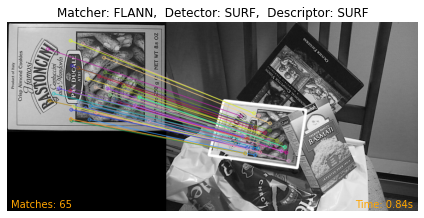

In [4]:
detector = 'SURF'
descriptor = 'SURF'
matcher = 'FLANN'

matcher = FeatureMatcher(detector, descriptor, matcher)
matches = matcher.match(image1, image2)
matcher.plot_matches()

## Run all combinations

In [ ]:
detectors = ['SIFT', 'SURF', 'KAZE', 'ORB', 'BRISK', 'AKAZE']
descriptors = ['SIFT', 'SURF', 'KAZE', 'BRIEF', 'ORB', 'BRISK', 'AKAZE', 'FREAK']
matcher_types = ['BF', 'FLANN']
for matcher_type in matcher_types:
    for detector in detectors:
        for descriptor in descriptors:
            print('--------------------------')
            try:
                print('Running {} {} {}'.format(detector, descriptor, matcher_type))
                matcher = FeatureMatcher(detector, descriptor, matcher_type)
                matches = matcher.match(image1, image2)
                matcher.plot_matches()
            except Exception as e:
                print("Some combinations are not supported and fail.")
                print('Error: {}'.format(e))
                continue